In [179]:
import pandas as pd

# Load the Excel file
file_path = "Coca-Cola_stock_history.csv"
data = pd.read_csv("Coca-Cola_stock_history.csv")

# Display basic info
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        15311 non-null  int64  
 6   Dividends     15311 non-null  float64
 7   Stock Splits  15311 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 957.1+ KB
None
         Date      Open      High       Low     Close   Volume  Dividends  \
0  1962-01-02  0.050016  0.051378  0.050016  0.050016   806400        0.0   
1  1962-01-03  0.049273  0.049273  0.048159  0.048902  1574400        0.0   
2  1962-01-04  0.049026  0.049645  0.049026  0.049273   844800        0.0   
3  1962-01-05  0.049273  0.049892  0.048035  0.048159  1420800        0.0   
4  1962-

In [181]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values
data.ffill(inplace=True) 
data.fillna(0, inplace=True)  

# Confirm no missing values remain
print(data.isnull().sum())


Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


In [183]:
# Add Moving Averages (Trend Indicators)
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Add Daily Returns (Volatility Indicator)
data['Daily_Return'] = data['Close'].pct_change()

# Add Volatility (Risk Indicator)
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()

# Drop rows with NA due to rolling calculations
data.dropna(inplace=True)

print(data.head())

          Date      Open      High       Low     Close   Volume  Dividends  \
49  1962-03-13  0.046416  0.046789  0.046416  0.046789  1344000   0.001563   
50  1962-03-14  0.046789  0.046976  0.046603  0.046852  1689600   0.000000   
51  1962-03-15  0.046852  0.046976  0.046603  0.046603   883200   0.000000   
52  1962-03-16  0.046603  0.046789  0.046603  0.046603   768000   0.000000   
53  1962-03-19  0.046603  0.047101  0.046603  0.046852   921600   0.000000   

    Stock Splits     MA_20     MA_50  Daily_Return  Volatility  
49             0  0.045788  0.046525      0.015962    0.013223  
50             0  0.045797  0.046461      0.001334    0.013226  
51             0  0.045836  0.046415     -0.005320    0.012546  
52             0  0.045889  0.046362      0.000000    0.012460  
53             0  0.045953  0.046336      0.005348    0.012491  


In [185]:
print(data.describe())


               Open          High           Low         Close        Volume  \
count  15262.000000  15262.000000  15262.000000  15262.000000  1.526200e+04   
mean      11.850660     11.944785     11.754847     11.853194  9.164087e+06   
std       15.035006     15.142659     14.924814     15.035590  7.957132e+06   
min        0.037154      0.037279      0.034890      0.037028  7.680000e+04   
25%        0.239461      0.241549      0.237297      0.239432  2.947200e+06   
50%        4.959658      5.012348      4.918166      4.959969  7.732300e+06   
75%       17.425250     17.663839     17.230594     17.456363  1.309292e+07   
max       66.037933     66.235058     64.776308     65.259270  1.241690e+08   

          Dividends  Stock Splits         MA_20         MA_50  Daily_Return  \
count  15262.000000  15262.000000  15262.000000  15262.000000  15262.000000   
mean       0.001683      0.001114     11.818108     11.760960      0.000576   
std        0.021336      0.049226     14.991442    

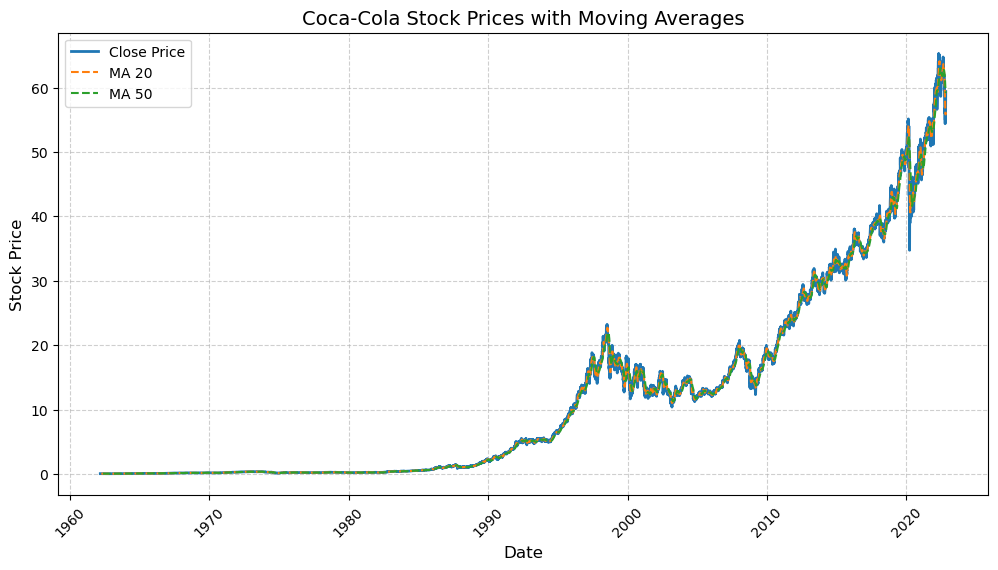

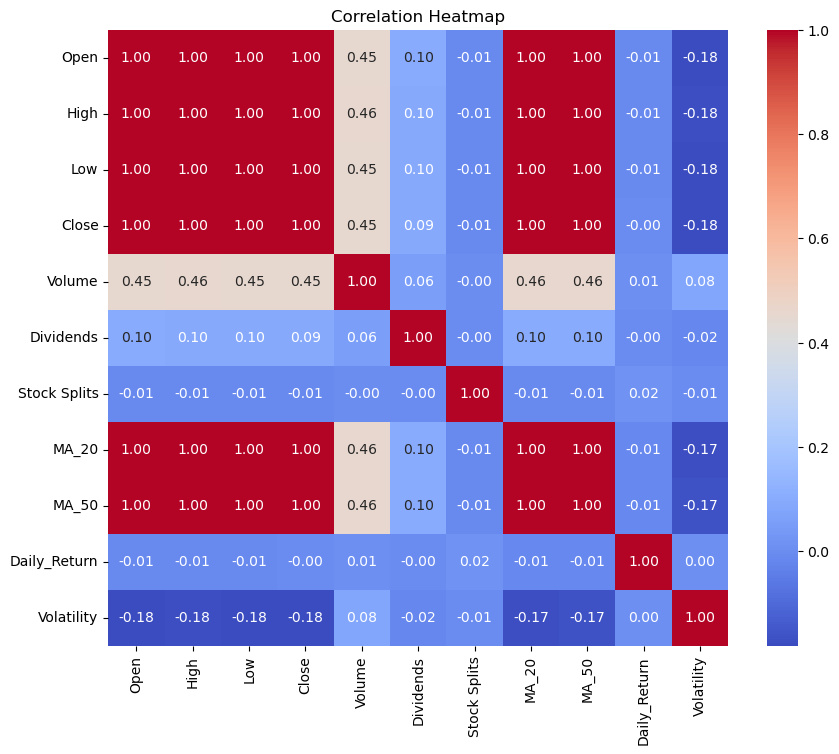

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clean Date Column (Fix conversion issues)
data['Date'] = data['Date'].astype(str).str.strip()  # Remove spaces
data['Date'] = data['Date'].str.split(' ').str[0]  # Keep only the date part
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert to datetime
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Sort Data
data = data.sort_values(by='Date')  

# Plot Stock Prices & Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', linewidth=2)
plt.plot(data['Date'], data['MA_20'], label='MA 20', linestyle='--', linewidth=1.5)
plt.plot(data['Date'], data['MA_50'], label='MA 50', linestyle='--', linewidth=1.5)
plt.title('Coca-Cola Stock Prices with Moving Averages', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.xticks(rotation=45)  
plt.grid(True, linestyle='--', alpha=0.6)  
plt.legend()
plt.show()

# Plot Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()




In [189]:
from sklearn.model_selection import train_test_split

# Define Features and Target Variable
features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
target = 'Close'

X = data[features]
y = data[target]

# Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


In [191]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train Model
model.fit(X_train, y_train)

# Predict on Test Data
y_pred = model.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 328.347798459561
Mean Absolute Error: 14.680693942073065


In [192]:
latest_data = pd.read_csv("Coca-Cola_stock_history.csv")
import pandas as pd

# Create Sample Latest Stock Data
latest_data = pd.DataFrame({
    'Open': [60.5], 'High': [61.0], 'Low': [59.8], 'Volume': [500000],
    'Dividends': [0.0], 'Stock Splits': [0], 'Close': [60.7]
})

# Feature Engineering
latest_data['MA_20'] = latest_data['Close']
latest_data['MA_50'] = latest_data['Close']
latest_data['Daily_Return'] = 0
latest_data['Volatility'] = 0

# Define Features
features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 
            'MA_20', 'MA_50', 'Daily_Return', 'Volatility']

# Predict
latest_features = latest_data[features]
live_prediction = model.predict(latest_features)

print(f"Predicted Closing Price: {live_prediction[0]:.2f}")


Predicted Closing Price: 23.14


In [193]:

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load Data
st.title('📈 Coca-Cola Stock Price Prediction')

file = st.file_uploader("Upload Stock Data (CSV or Excel)", type=['csv', 'xlsx'])

if file:
    # Read the file
    if file.name.endswith('.csv'):
        data = pd.read_csv(file)
    else:
        data = pd.read_excel(file, engine='openpyxl')

    data['Date'] = pd.to_datetime(data['Date'])
    data.sort_values(by='Date', inplace=True)

    # Feature Engineering
    data['MA_20'] = data['Close'].rolling(window=20).mean()
    data['MA_50'] = data['Close'].rolling(window=50).mean()
    data['Daily_Return'] = data['Close'].pct_change()
    data['Volatility'] = data['Daily_Return'].rolling(window=20).std()
    data.fillna(0, inplace=True)

    # Define Features
    features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
    X = data[features]
    y = data['Close']

    # Train Model
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict Last Row
    latest_features = X.iloc[-1:].dropna()
    live_prediction = model.predict(latest_features)

    # Visualization
    st.subheader("Stock Prices & Moving Averages")
    st.line_chart(data[['Close', 'MA_20', 'MA_50']])

    # Correlation Heatmap
    st.subheader("Correlation Heatmap")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm", ax=ax)
    st.pyplot(fig)

    # Prediction Result
    st.subheader("📌 Predicted Closing Price")
    st.write(f"💰 **Predicted Price:** ${live_prediction[0]:.2f}")



In [194]:
file_path = "C:\\Users\\harsh\\OneDrive\\Desktop\\financial analysis internship\\Coca-Cola_stock_history.csv"
data = pd.read_csv(file_path)  


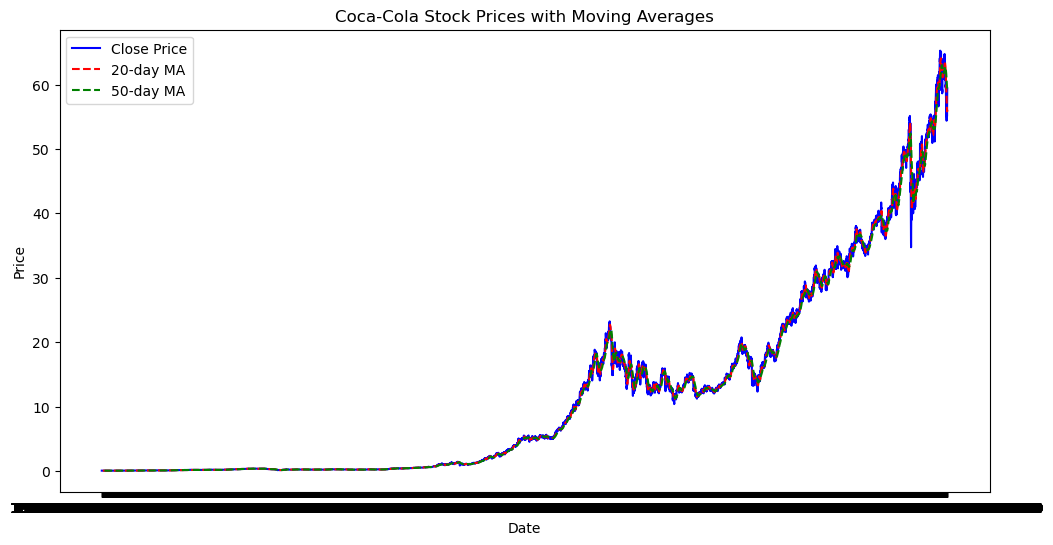

In [195]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['MA_20'], label='20-day MA', linestyle='--', color='red')
plt.plot(data['Date'], data['MA_50'], label='50-day MA', linestyle='--', color='green')
plt.title('Coca-Cola Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


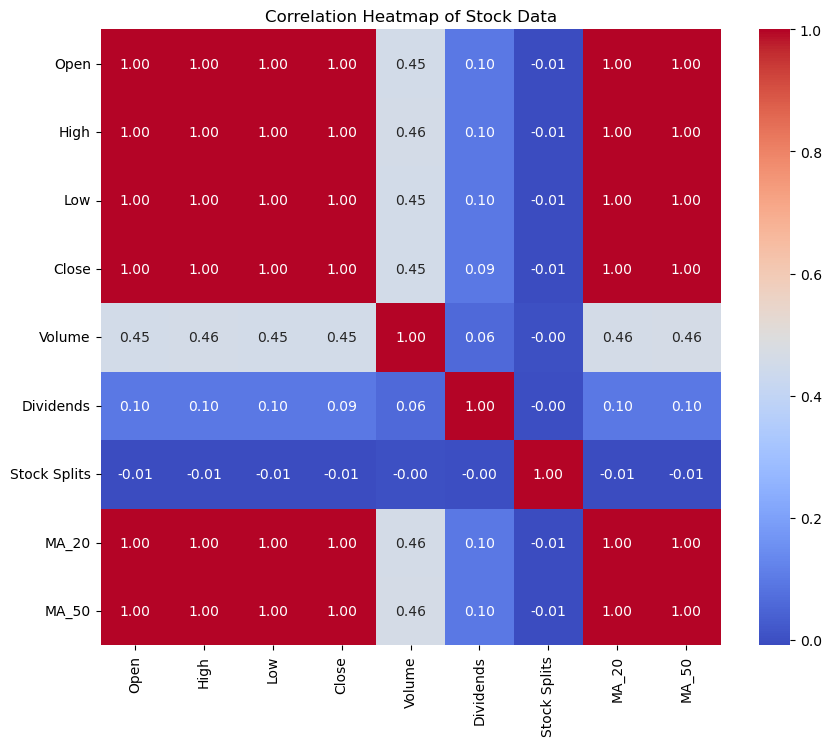

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure only numeric columns are used for correlation
numeric_data = data.select_dtypes(include=['number'])

# Handle missing values before correlation
numeric_data = numeric_data.dropna()

# Plot Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Stock Data')
plt.show()


In [217]:
from sklearn.model_selection import train_test_split
# Calculate Moving Averages
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Calculate Daily Return and Volatility
data['Daily_Return'] = data['Close'].pct_change()  # Percentage change in Close price
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()  # Rolling standard deviation

# Fill missing values caused by rolling calculations
data.fillna(0, inplace=True)

# Now define features
features = ['Open', 'High', 'Low', 'Volume', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
target = 'Close'

X = data[features]
y = data[target]



In [219]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define Features (X) and Target (y)
features = ['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits', 'MA_20', 'MA_50', 'Daily_Return', 'Volatility']
X = data[features]  # Independent variables
y = data['Close']   # Target variable (Stock Price)

# Fix the train-test split (Use 20% data for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train the Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")



Mean Squared Error: 326.7144377255932
Mean Absolute Error: 14.614203108990917


In [ ]:
data.to_csv("Coca_Cola_Stock_Analysis.csv", index=False)

